In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [2]:
data= pd.read_csv("D:\Data-Core\CAPSTONE PROJECT 1\Property Price Prediction\House Price.csv")
print("Dataset:\n",data.head())

Dataset:
   POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner                   0     0        2       BHK  1300.236407   
1    Dealer                   0     0        2       BHK  1275.000000   
2     Owner                   0     0        2       BHK   933.159722   
3     Owner                   0     1        2       BHK   929.921143   
4    Dealer                   1     0        2       BHK   999.009247   

   READY_TO_MOVE  RESALE                      ADDRESS  LONGITUDE   LATITUDE  \
0              1       1        Ksfc Layout,Bangalore  12.969910  77.597960   
1              1       1    Vishweshwara Nagar,Mysore  12.274538  76.644605   
2              1       1             Jigani,Bangalore  12.778033  77.632191   
3              1       1  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500   
4              0       1             New Town,Kolkata  22.592200  88.484911   

   TARGET(PRICE_IN_LACS)  
0                   55.0  
1                   51

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\anubh\AppData\Local\Temp\ipykernel_20332\699395311.py:1: SyntaxWarning: invalid escape sequence '\D'
  data= pd.read_csv("D:\Data-Core\CAPSTONE PROJECT 1\Property Price Prediction\House Price.csv")


In [3]:
print("Dataset Shape:\n",data.shape)

Dataset Shape:
 (29451, 12)


In [4]:
print("Dataset Null-Values:\n",data.isnull().sum())

Dataset Null-Values:
 POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64


In [7]:
print("Dataset Type:\n",data.dtypes)

Dataset Type:
 POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object


In [9]:
numeric_dataset= data.select_dtypes(['number'])

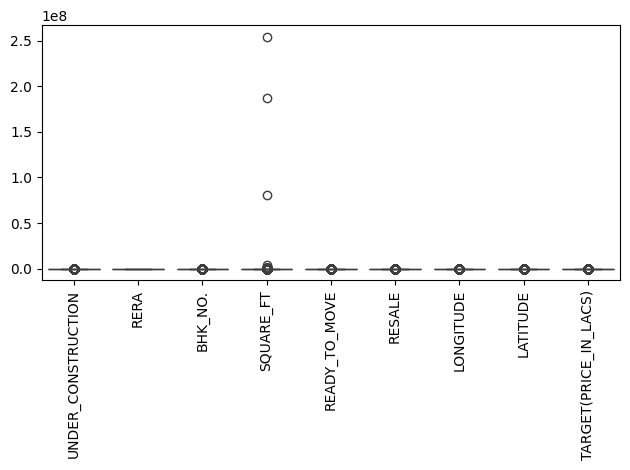

In [21]:
sns.boxplot( numeric_dataset)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
corr_matrix= numeric_dataset.corr()

In [11]:
print("Correlation:\n",corr_matrix)

Correlation:
                        UNDER_CONSTRUCTION      RERA   BHK_NO.  SQUARE_FT  \
UNDER_CONSTRUCTION               1.000000  0.363826 -0.040712  -0.004204   
RERA                             0.363826  1.000000  0.009547  -0.006229   
BHK_NO.                         -0.040712  0.009547  1.000000   0.005303   
SQUARE_FT                       -0.004204 -0.006229  0.005303   1.000000   
READY_TO_MOVE                   -1.000000 -0.363826  0.040712   0.004204   
RESALE                          -0.347405 -0.270351  0.014581   0.001732   
LONGITUDE                        0.006440  0.104976  0.068730  -0.012591   
LATITUDE                        -0.000381 -0.065106  0.046930   0.000803   
TARGET(PRICE_IN_LACS)            0.055399  0.067636  0.112283   0.402685   

                       READY_TO_MOVE    RESALE  LONGITUDE  LATITUDE  \
UNDER_CONSTRUCTION         -1.000000 -0.347405   0.006440 -0.000381   
RERA                       -0.363826 -0.270351   0.104976 -0.065106   
BHK_NO.     

Linear Regression

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
x=data[['UNDER_CONSTRUCTION', 'RERA', 'READY_TO_MOVE']]
y= data['TARGET(PRICE_IN_LACS)']

In [23]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
model= LinearRegression()

In [25]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Linear Regression MSE 

In [26]:
y_pred= model.predict(x_test)

In [27]:
mse1= mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse1:.2f}")

Mean Squared Error: 543865.81


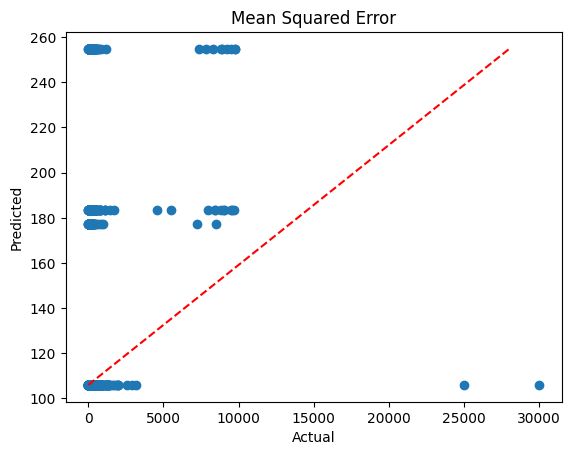

In [48]:
plt.scatter(y_test, y_pred)
plt.plot([y_train.min(),y_train.max()], [y_pred.min(), y_pred.max()], 'r--')
plt.title("Mean Squared Error")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor
rfg= RandomForestRegressor(n_estimators=200, max_depth= None, random_state=42)
rfg.fit(x_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_pred1= rfg.predict(x_test)

In [41]:
mse2= mean_squared_error(y_test, y_pred1)
print(f"Mean Squared Error: {mse2:.2f}")

Mean Squared Error: 543957.73


Hyperparameter Tuning with Random Forest

In [67]:
parameter_grid= {
    'n_estimators': [50,100,200],
    'max_depth': [None, 10, 20 ,30],
    'min_samples_split': [2,5, 10]
}

In [68]:
from sklearn.model_selection import GridSearchCV
grid_search= GridSearchCV(estimator= rfg, param_grid=parameter_grid, cv= 5, n_jobs= 2, scoring= 'neg_mean_squared_error', verbose= 2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,2
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [69]:
print("Best Estimator:", grid_search.best_estimator_)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Estimator: RandomForestRegressor(n_estimators=50, random_state=42)
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: -400151.25153087254


In [70]:
y_pred2= grid_search.best_estimator_.predict(x_test)


In [71]:
mse3= mean_squared_error(y_test, y_pred2)
print("Mean Squared Error:",mse3)

Mean Squared Error: 544031.7687549809


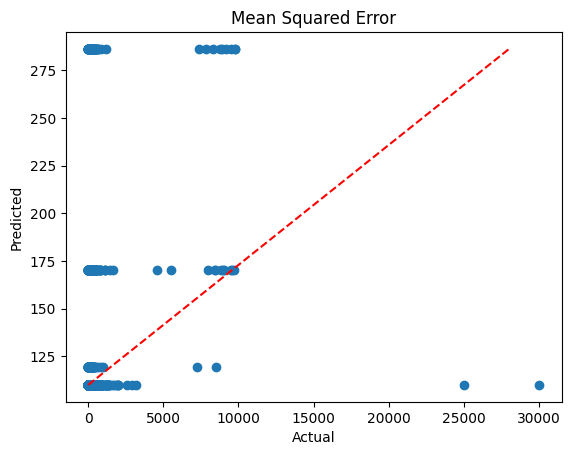

In [72]:
plt.scatter(y_test, y_pred2)
plt.plot([y_train.min(),y_train.max()], [y_pred2.min(), y_pred2.max()], 'r--')
plt.title("Mean Squared Error")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Linear Regression Prediction(Random Value) 

In [53]:
random_value = [[1, 1, 0]] 
prediction = model.predict(random_value)
print("Predicted Price:", prediction[0])

Predicted Price: 254.775510274233


d:\Data-Core\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Random Forest Regression Prediction(Random Value) 

In [54]:
random_value = [[1, 1, 0]] 
prediction = rfg.predict(random_value)
print("Predicted Price:", prediction[0])

Predicted Price: 281.1670939244787


d:\Data-Core\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Hyper Parameter Tuning Prediction(RFG) 

In [73]:
random_value = [[1, 1, 0]] 
prediction = grid_search.best_estimator_.predict(random_value)
print("Predicted Price:", prediction[0])

Predicted Price: 286.12613287709706


d:\Data-Core\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Hyper Parameter Tuning with Gradient Boost

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
gd_boost= GradientBoostingRegressor(random_state=42)

In [64]:
grid_search2 = GridSearchCV(estimator=gd_boost, param_grid=parameter_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)
grid_search2.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [74]:
print("Best Estimator:", grid_search2.best_estimator_)
print("Best Parameters:", grid_search2.best_params_)
print("Best Cross-Validation Score:", grid_search2.best_score_)

Best Estimator: GradientBoostingRegressor(max_depth=None, n_estimators=50, random_state=42)
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: -400174.1716959111


In [75]:
y_pred3= grid_search2.best_estimator_.predict(x_test)

In [76]:
mse4= mean_squared_error(y_test, y_pred3)
print("Mean Squared Error:",mse4)

Mean Squared Error: 543931.020882348


Hyper Parameter Tuning Prediction(GD_Boost)

In [77]:
random_value = [[1, 1, 0]] 
prediction = grid_search2.best_estimator_.predict(random_value)
print("Predicted Price:", prediction[0])

Predicted Price: 278.98965928518356


d:\Data-Core\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
